# Case Study 2: How Can a Wellness Technology Company Play It Smart?

## Bellabeat case study

# Ask

Business Task:
The objective is to analyze smart device usage data to gain actionable insights into consumer behavior and trends. These insights will help Bellabeat understand how their products align with consumer needs and inform their marketing strategy to drive growth in the smart wellness device market.

Key Stakeholders:
* Urška Sršen: Cofounder and Chief Creative Officer
* Sando Mur: Cofounder and key executive team member
* Bellabeat Marketing Analytics Team: Responsible for collecting, analyzing, and reporting data
* Bellabeat Consumers: The primary audience for recommendations derived from the analysis


# Prepare

Data source
This Kaggle data set contains 18 csv files related to data about personal fitness trackers from thirty FitBit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.This dataset was generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016 and 05.12.2016. And it was updated 10 months ago from now on.

Limitations
* It contains data from only 30 Fitbit users.
* The data is about eight years old; the FitBit devices have likely evolved to deliver more accurate results.


Supporting data 

As Fitbit tracker data only contains data up to 2016, it may be different from the situation in the present. So, an additional data source would be useful in the analysis. The Mi Band fitness tracker data (04.2016–2023) contains data relating to steps and sleep monitoring for one individual from April 2016 to July 2022 collected from the Mi Band from Xiaomi. The data is stored in two CSV files, one for steps and one for sleep.Although this data didn't cover the data up until now, this may help to overcome some misleading insights that may occur.






# Process

Choosing Data Files
As dailyActivity_merged.csv provides a good summary of steps and calories burned and the sleepDay_merged. csv file provides sleep data; these are good overall files to use to analyze participant usage. As fitness devices are generally used to track overall health and weight, the file weightLogInfo_merged containing weight data will also be used.

Applications
Excel will be used to load and take an initial pass for issues, R notebook in kaggle to transform and explore the data, and Tableau to interactively visualize the data.


Cleaning Process
* Removing duplicates of each files
* Identify blank cells and remove those.
* In the weightLogInfo_merged file, there are only two entries for the Fat field, so this will not be used to draw insights.
* Change the ID field to Text since it is not used for calculation.
* In all the files, change the data type of the Date column to short Date.
* Change the colomn related to distance into a number with 3 decimal places because it may be used for calculations.(Alot of decimal places wouldnot be necessary.)
* Remove unnecessary decimal places in data to reduce the complexity of the data


# Tranform Data 

In [15]:
#Install Tidyverse
install.packages("tidyverse")
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [16]:
# Create a dataframe for dailyActivity, sleepDat, weightLogInfo

activity <-read_csv("/kaggle/input/example/dailyActivity_merged.csv")
sleep <-read_csv("/kaggle/input/example/sleepDay_merged.csv")
weight <-read_csv("/kaggle/input/example/weightLogInfo_merged.csv")


Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 67 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Date
dbl (6): Id, WeightKg, WeightPounds, Fat, BMI, LogId
lgl (1): IsManualReport

ℹ Use `spec()` to retrieve the full column specification fo

In [17]:
# Check that the data has loaded correctly 

head(activity)
head(sleep)
head(weight)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


In [18]:
# Convert Id to character data type 
# Convert Day to date format 
# Rename various types of dates to Date

activity <-activity %>%
  mutate_at(vars(Id), as.character) %>%
  mutate_at(vars(ActivityDate), as.Date, format = "%m/%d/%y") %>%
  rename("Date"="ActivityDate") 
  

sleep <-sleep %>%
  mutate_at(vars(Id), as.character) %>%
  mutate_at(vars(SleepDay), as.Date, format = "%m/%d/%y") %>%
  rename("Date"="SleepDay")

weight <-weight %>%
  mutate_at(vars(Id,LogId), as.character) %>%
  mutate_at(vars(Date),as.Date, format = "%m/%d/%y")

In [19]:
# Combine data frames; add day of the week 
combined_data <-sleep %>%
  right_join(activity, by=c("Id","Date")) %>%
  left_join(weight, by=c("Id", "Date")) %>%
  mutate(Weekday = weekdays(as.Date(Date, "m/%d/%Y")))


In [20]:
View(combined_data)

Id,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,⋯,LightlyActiveMinutes,SedentaryMinutes,Calories,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,Weekday
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<chr>
1503960366,2020-04-12,1,327,346,13162,8.50,8.50,0,1.88,⋯,328,728,1985,NA,NA,NA,NA,NA,NA,Sunday
1503960366,2020-04-13,2,384,407,10735,6.97,6.97,0,1.57,⋯,217,776,1797,NA,NA,NA,NA,NA,NA,Monday
1503960366,2020-04-15,1,412,442,9762,6.28,6.28,0,2.14,⋯,209,726,1745,NA,NA,NA,NA,NA,NA,Wednesday
1503960366,2020-04-16,2,340,367,12669,8.16,8.16,0,2.71,⋯,221,773,1863,NA,NA,NA,NA,NA,NA,Thursday
1503960366,2020-04-17,1,700,712,9705,6.48,6.48,0,3.19,⋯,164,539,1728,NA,NA,NA,NA,NA,NA,Friday
1503960366,2020-04-19,1,304,320,15506,9.88,9.88,0,3.53,⋯,264,775,2035,NA,NA,NA,NA,NA,NA,Sunday
1503960366,2020-04-20,1,360,377,10544,6.68,6.68,0,1.96,⋯,205,818,1786,NA,NA,NA,NA,NA,NA,Monday
1503960366,2020-04-21,1,325,364,9819,6.34,6.34,0,1.34,⋯,211,838,1775,NA,NA,NA,NA,NA,NA,Tuesday
1503960366,2020-04-23,1,361,384,14371,9.04,9.04,0,2.81,⋯,262,732,1949,NA,NA,NA,NA,NA,NA,Thursday


In [21]:
# Find and remove duplicate rows; count NAs and distinct Ids
combined_data <-combined_data[!duplicated(combined_data), ]
sum(is.na(combined_data))
n_distinct(combined_data$Id)
n_distinct(sleep$Id)
n_distinct(weight$Id)

[1] 6893

[1] 33

[1] 24

[1] 8

In [22]:
# Order the days of the week
combined_data$Weekday <-factor(combined_data$Weekday, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))


# Analyze Data
Select summary statistics and visualizations


In [23]:
# Select summary statistics 
combined_data %>%
  select(TotalMinutesAsleep, TotalSteps, TotalDistance, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes, Calories, WeightKg, Fat, BMI, IsManualReport,LoggedActivitiesDistance) %>%
  summary()

 TotalMinutesAsleep   TotalSteps    TotalDistance    VeryActiveMinutes
 Min.   : 58.0      Min.   :    0   Min.   : 0.000   Min.   :  0.00   
 1st Qu.:361.0      1st Qu.: 3790   1st Qu.: 2.620   1st Qu.:  0.00   
 Median :432.5      Median : 7406   Median : 5.245   Median :  4.00   
 Mean   :419.2      Mean   : 7638   Mean   : 5.490   Mean   : 21.16   
 3rd Qu.:490.0      3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.: 32.00   
 Max.   :796.0      Max.   :36019   Max.   :28.030   Max.   :210.00   
 NA's   :530                                                          
 FairlyActiveMinutes LightlyActiveMinutes SedentaryMinutes    Calories   
 Min.   :  0.00      Min.   :  0.0        Min.   :   0.0   Min.   :   0  
 1st Qu.:  0.00      1st Qu.:127.0        1st Qu.: 729.8   1st Qu.:1828  
 Median :  6.00      Median :199.0        Median :1057.5   Median :2134  
 Mean   : 13.56      Mean   :192.8        Mean   : 991.2   Mean   :2304  
 3rd Qu.: 19.00      3rd Qu.:264.0        3rd Qu.:1229.5   3rd

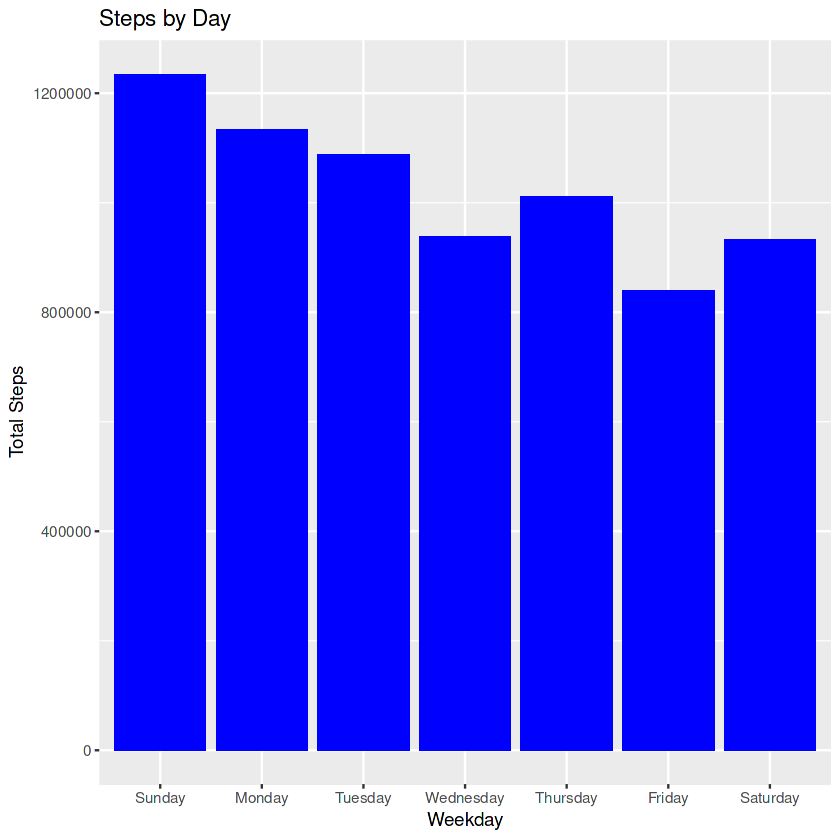

In [24]:
# Total steps by day 
ggplot(data=combined_data, aes(x=Weekday, y=TotalSteps)) + 
  geom_bar(stat="identity", fill="#0000FF")+
  labs(title="Steps by Day", y="Total Steps") 
  






This graph demonstrates that users took most steps on Sunday and least steps on Friday. This may be because most of the users feel exhausted with work at the end of the weekdays. So, they are paying more attention on weekends.

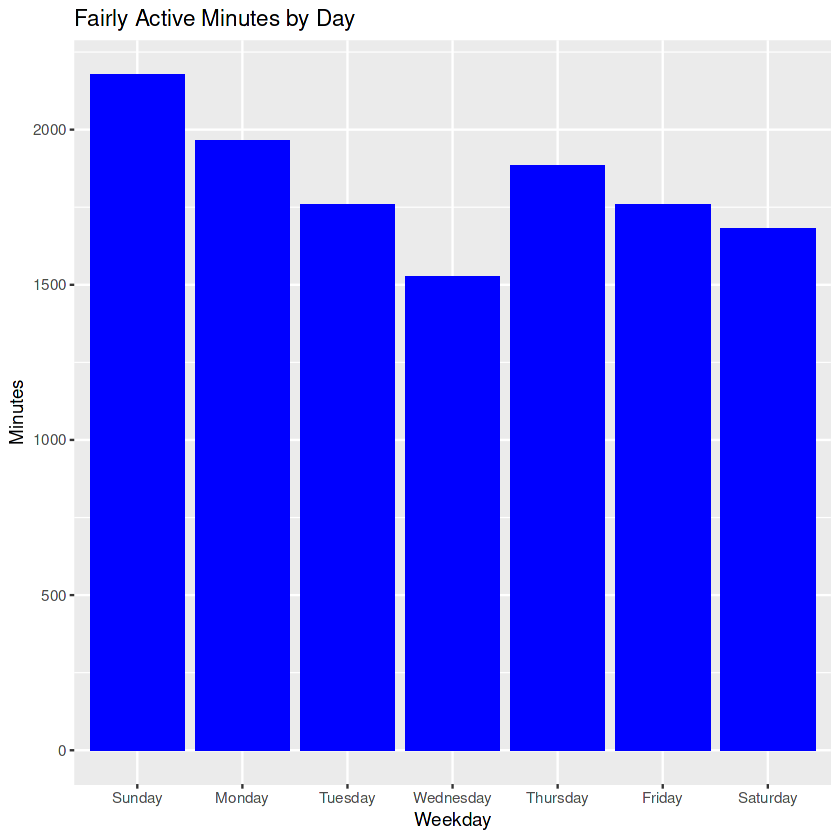

In [25]:
# Minutes of moderate activity per day 
ggplot(data=combined_data, aes(x=Weekday, y=FairlyActiveMinutes)) + 
  geom_bar(stat="identity", fill="#0000FF")+
  labs(title="Fairly Active Minutes by Day", y="Minutes") 


According to this plot, the amount of time being fairly active has been decreased by the middle of the week. It may be because users find it difficult to find energy to workout by the middle of the week. After taking some rest, allow them to resume on Thursday onwards.

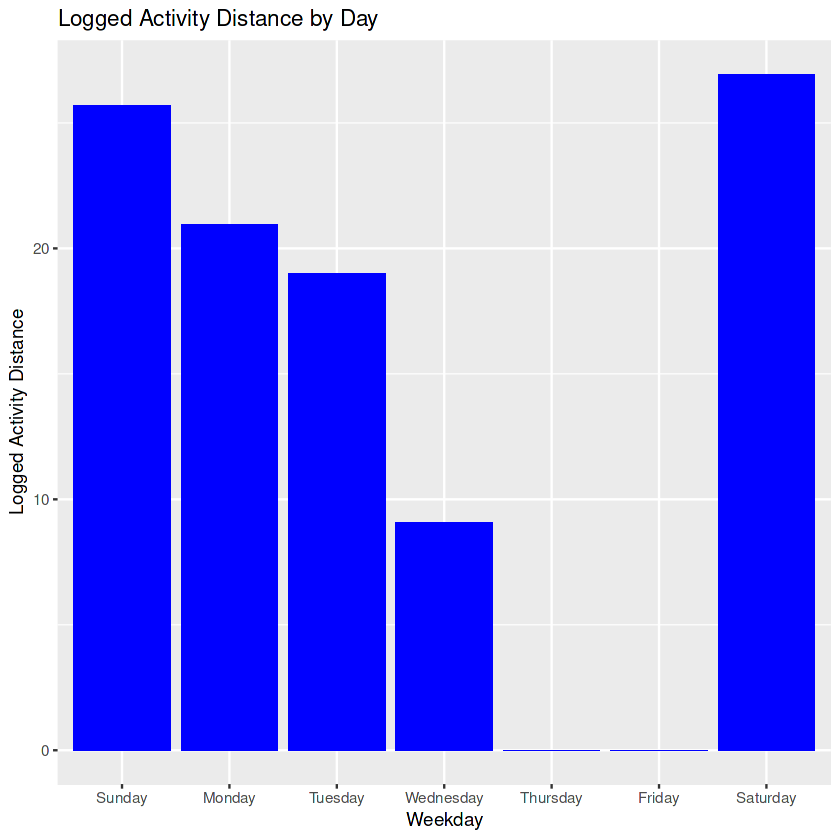

In [26]:
# Logged Activities Distance 
ggplot(data=combined_data, aes(x=Weekday, y=LoggedActivitiesDistance)) + 
  geom_bar(stat="identity", fill="#0000FF")+
  labs(title="Logged Activity Distance by Day", y="Logged Activity Distance") 


In this graph, there may be some unconsistencies in the dataset. Because the majority of the users did not record their logged activity distance.The plot demonstrates that lag activity distance has decreased at the end of the weekdays. It may be because of the unconsistencies of the data. However, logged activity distance, especially, has improved on the weekends.

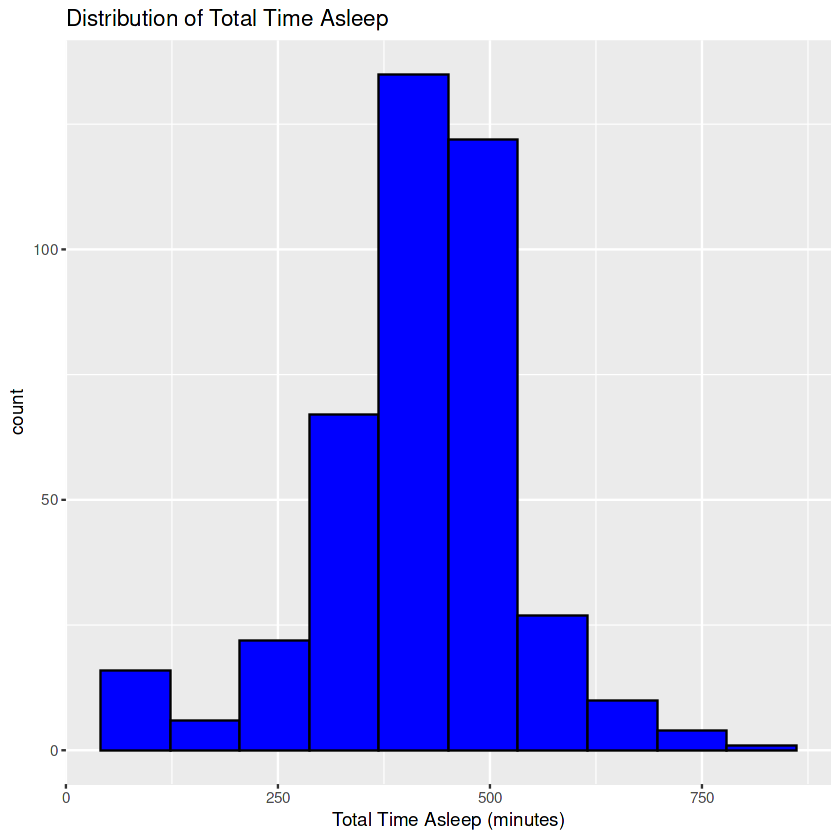

In [27]:
# Distribution of sleep time 
ggplot(combined_data, aes(TotalMinutesAsleep)) +
  geom_histogram(bins=10, na.rm=TRUE,color = "#000000",fill="#0000FF" )+
  labs(title="Distribution of Total Time Asleep", x="Total Time Asleep (minutes)") 


From the above histogram, most people slept between 312 and 563 minutes (between 5.2 and 9.4 hours). Note that this does not include the total time spent in bed resting.



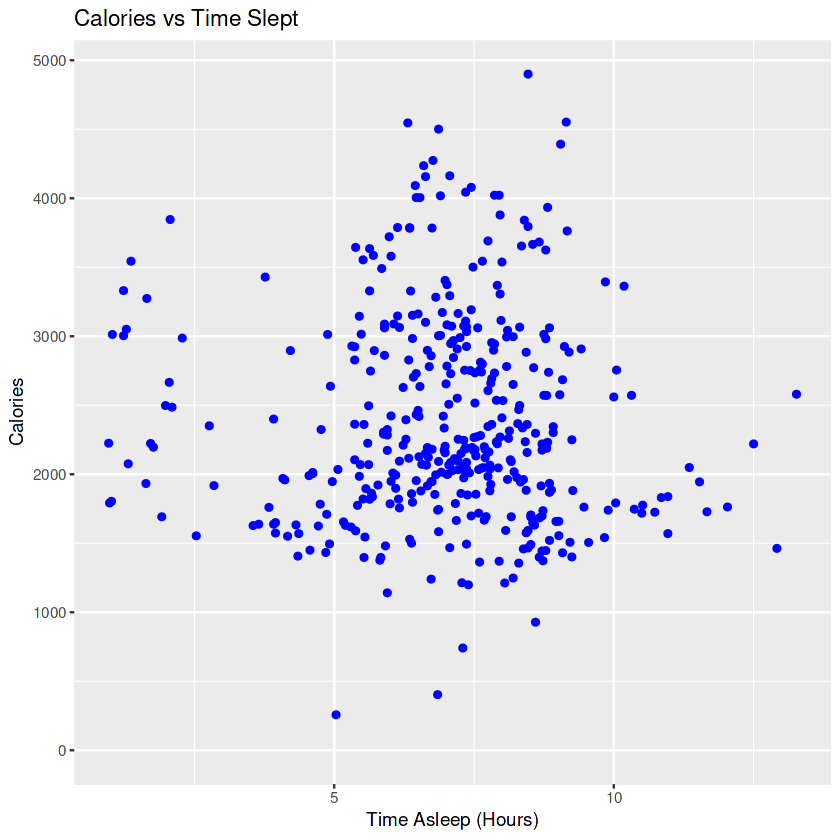

In [29]:
# Total minutes Asleep vs Calories
ggplot(combined_data) +
  geom_point(mapping = aes(x=TotalMinutesAsleep/60, y=Calories), na.rm=TRUE, color="#0000FF") +
  labs(title="Calories vs Time Slept", x="Time Asleep (Hours)", y="Calories") 


Apart from the outliers, from this scatter plot, the users that sleep between 5 to 10 hours burn calories. The users who sleep under 5 hours and more than 10 hours tend to burn the least amount of calories.

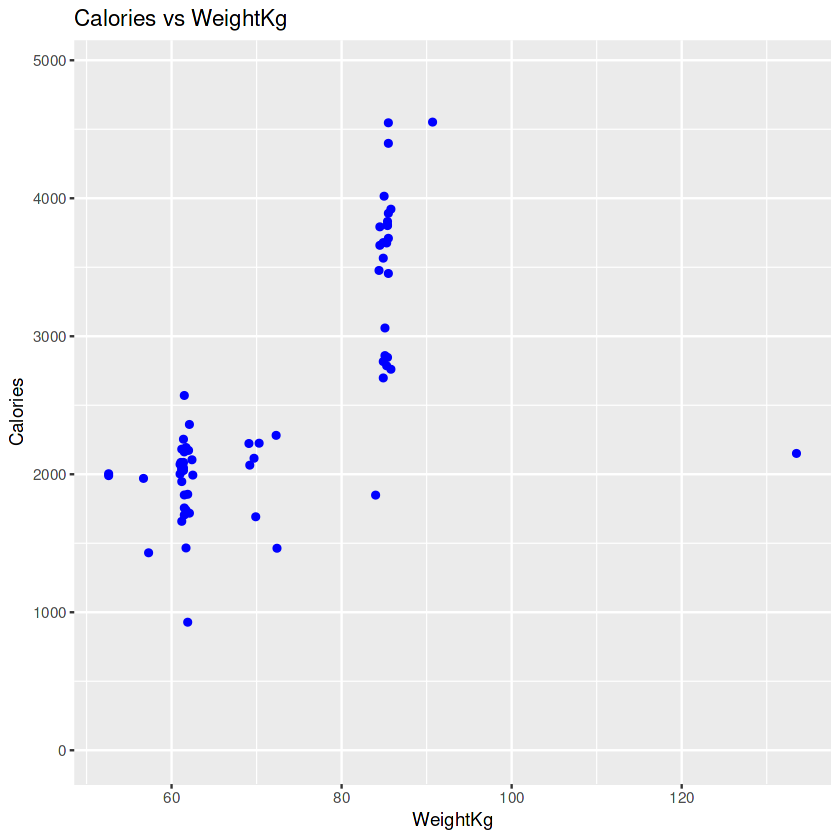

In [30]:
# Total minutes Asleep vs Calories
ggplot(combined_data) +
  geom_point(mapping = aes(x=WeightKg, y=Calories), na.rm=TRUE, color="#0000FF") +
  labs(title="Calories vs WeightKg", x="WeightKg", y="Calories") 


From this scatter plot, there are two clusters.The users weigh around 60–70 kg, and the users weigh around 80–90 kg.The users with the first cluster may be regular users that workout as a hobby.They also burn fewer calories compared to the second cluster. The second cluster users are around 80–90 kg.Since it is overweight, they may be motivated to burn more calories than regular users.

# Act

The amount of steps taken by the user has decreased in the middle of the week.This may be because most of the users feel exhausted with work at the end of the weekdays.Since FitBit has identified this insight, the marketing team could send notifications to users on Tuesday evening, Wednesday morning, Thursday evening, and Friday morning in case to notify the users to keep active throughout the week.and also they can set a goal of steps for each of the users considering their data to keep motivated.


The amount of time being fairly active has decreased by the middle of the week. It may be because users find it difficult to find energy to workout by the middle of the week.The marketing team could send notifications to users to notify them about their fairly active time and alert them about being more productive.

Because the majority of the users did not record their logged activity distance, there is a lot of blank data in the column. Considering that the marketing team can identify that users do not pay attention to recording their logged activity distance. So they can add a feature to automatically record user activity distance.

From the calories vs weightKg plot, the users weight around 80–90 kg tend to burn calories more compared to users weight around 60–70 kg. So, the team can set agoal from calculating burned calories, weight, and height to achieve their desired BMI values. It would be great for overweight users.
